In [12]:
pwd

'c:\\Users\\cutic\\OneDrive\\Escritorio\\Tecnológico de Monterrey\\Octavo semestre\\Desarrollo de aplicaciones avanzadas de ciencias computacionales\\IAModulo2'

# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



base_dir = os.path.abspath(os.getcwd())

print(base_dir)

train_dir = os.path.join(base_dir,'Train')
print(train_dir)
test_dir = os.path.join(base_dir, 'Test')
print(test_dir)
train_datagen = ImageDataGenerator(
							rescale = 1./255,
                            #Agregar rotación aporta variablidad y ayuda a que el modelo sea capaz de reconocer al animal en diferentes orientaciones
							rotation_range = 30,
                            #Hacer estos cambios de posición hacen que el modelo pueda identificar mejor al objeto posicionado en distintas partes de la imagen
							width_shift_range = 0.2,
							height_shift_range = 0.2,
                            #este parametro distorsiona la imagen extendiendola (tilting) hacia un lado. nos puede ayudar a identificar las imagenes en esccenarios de movimiento
							shear_range = 0.2,
                            #Esto ayuda a poder reconocer los animales a diferentes escalas de tamaño en la imagen
							zoom_range = 0.3,
                            #Invertir la imagen ayuda a tener mas variedad de posicionamiento, para poder clasificar mejor en disitntas posiciones
							horizontal_flip = True,)
							



c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear\Train
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear\Test


En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 500 images belonging to 2 classes.
(8, 150, 150, 3)
[0. 0. 1. 0. 0. 1. 0. 1.]


<Figure size 640x480 with 0 Axes>

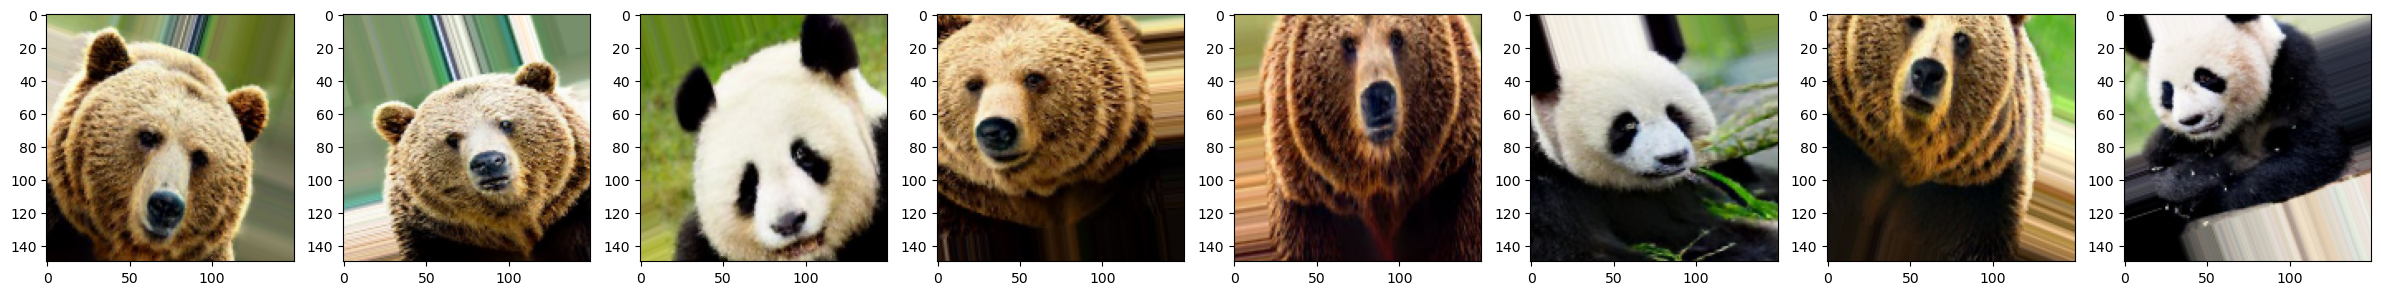

In [2]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

## Modelo 1: Red convolutiva básica

In [10]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-2),
						metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_1 (Flatten)         (None, 219040)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               28037248  
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,037,657
Trainable params: 28,037,657
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
63/63 [==============================] - 13s 195ms/step - loss: 45.8539 - acc: 0.7520
Epoch 2/10
63/63 [==============================] - 12s 196ms/step - loss: 1.8174 - acc: 0.7900
Epoch 3/10
63/63 [==============================] - 12s 195ms/step - loss: 0.2746 - acc: 0.9020
Epoch 4/10
63/63 [==============================] - 12s 195ms/step - loss: 0.2933 - acc: 0.8820
Epoch 5/10
63/63 [==============================] - 12s 196ms/step - loss: 0.2013 - acc: 0.9380
Epoch 6/10
63/63 [==============================] - 12s 197ms/step - loss: 0.1807 - acc: 0.9420
Epoch 7/10
63/63 [==============================] - 13s 199ms/step - loss: 0.1593 - acc: 0.9460
Epoch 8/10
63/63 [==============================] - 13s 203ms/step - loss: 0.1456 - acc: 0.9540
Epoch 9/10
63/63 [==============================] - 13s 200ms/step - loss: 0.1249 - acc: 0.9660
Epoch 10/10
63/63 [==============================] - 14s 217ms/step - loss: 0.1384 - acc: 0.9440


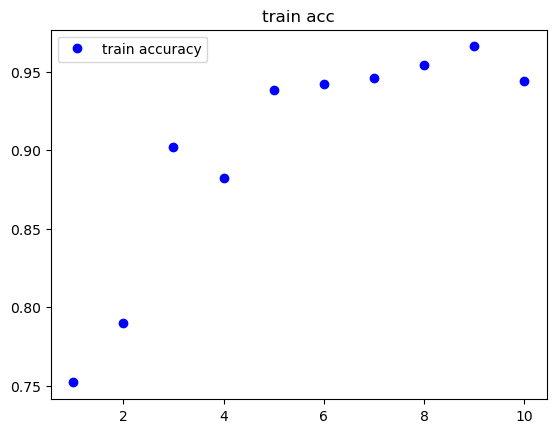

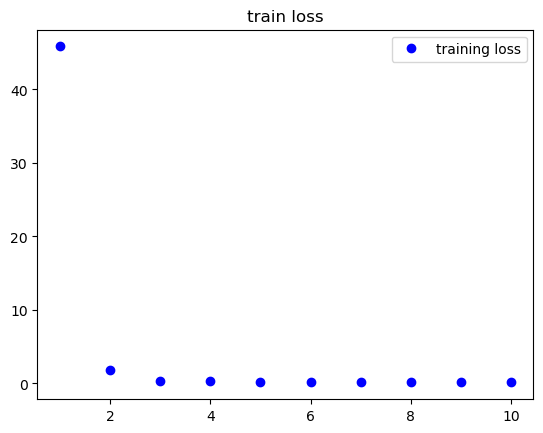

In [11]:

history = model.fit(
						train_generator, 
						epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [21]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 5,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
10/10 [==============================] - 0s 15ms/step - loss: 417.3266 - acc: 0.5800

test acc :
 0.5799999833106995


Vemos un desempeño pobre en el modelo, con un accuracy de 0.94 en train y apenas 0.57 en test. Probemos modificando hiperparámetros como el learning rate, así como agregando una capa densa adicional para atrapar caracerísticas

## Modelo 2: Red convolutiba básica mejorada

In [24]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-3),
						metrics=['acc'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_3 (Flatten)         (None, 219040)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               28037248  
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,037,657
Trainable params: 28,037,657
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
63/63 [==============================] - 13s 201ms/step - loss: 14.1426 - acc: 0.8360
Epoch 2/10
63/63 [==============================] - 12s 196ms/step - loss: 1.1832 - acc: 0.9360
Epoch 3/10
63/63 [==============================] - 12s 196ms/step - loss: 0.1608 - acc: 0.9560
Epoch 4/10
63/63 [==============================] - 12s 194ms/step - loss: 0.1421 - acc: 0.9720
Epoch 5/10
63/63 [==============================] - 12s 194ms/step - loss: 0.1939 - acc: 0.9520
Epoch 6/10
63/63 [==============================] - 12s 196ms/step - loss: 0.0540 - acc: 0.9840
Epoch 7/10
63/63 [==============================] - 12s 197ms/step - loss: 0.2849 - acc: 0.9720
Epoch 8/10
63/63 [==============================] - 12s 197ms/step - loss: 0.1479 - acc: 0.9700
Epoch 9/10
63/63 [==============================] - 14s 217ms/step - loss: 0.0398 - acc: 0.9900
Epoch 10/10
63/63 [==============================] - 13s 201ms/step - loss: 0.0623 - acc: 0.9900


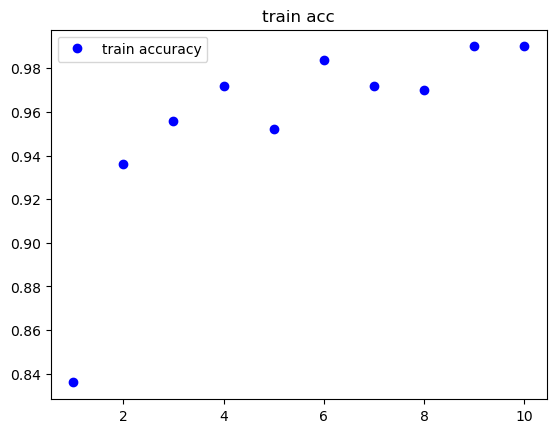

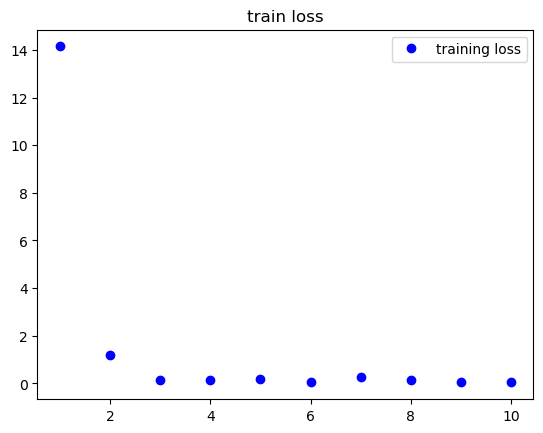

In [25]:

history = model.fit(
						train_generator, 
						epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [27]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 5,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
10/10 [==============================] - 0s 19ms/step - loss: 2.7079 - acc: 0.9800

test acc :
 0.9800000190734863


Vemos una mejora muy grande, en parte debido a la simplicidad del dataset. Tenemos un desempeño de 0.99 en train y 0.98 en test. Probemos ahora con transfer learning, para ver si un modelo preentrenado de alta calidad es capaz de perfeccionar el modelo bajo las pruebas existentes

## Modelo 3: Transfer Learning (MobileNetV2)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						

In [27]:
# Instanciamos Mobile Net v2

base_model = keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False


In [28]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [29]:
# Compilamos el modelo utilizando el optimizador RMSprop con un lr personalizado, así como una función de pérdida para funciones binarias

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-2),
              metrics=['accuracy'])


In [30]:
history = model.fit(train_generator,
                    epochs=10)


Epoch 1/10
63/63 [==============================] - 13s 126ms/step - loss: 0.8691 - accuracy: 0.9760
Epoch 2/10
63/63 [==============================] - 8s 119ms/step - loss: 9.0290e-07 - accuracy: 1.0000
Epoch 3/10
63/63 [==============================] - 7s 116ms/step - loss: 2.7238e-14 - accuracy: 1.0000
Epoch 4/10
63/63 [==============================] - 7s 117ms/step - loss: 3.7314e-38 - accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 7s 117ms/step - loss: 3.7519e-37 - accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 8s 120ms/step - loss: 8.5489e-34 - accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 7s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
63/63 [==============================] - 7s 118ms/step - loss: 5.6209e-32 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 8s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 8s 120ms/step 

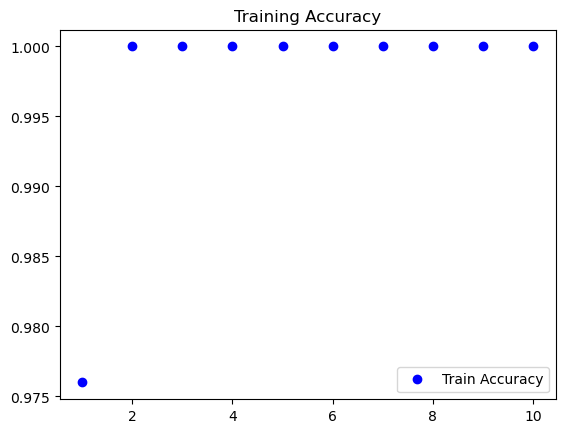

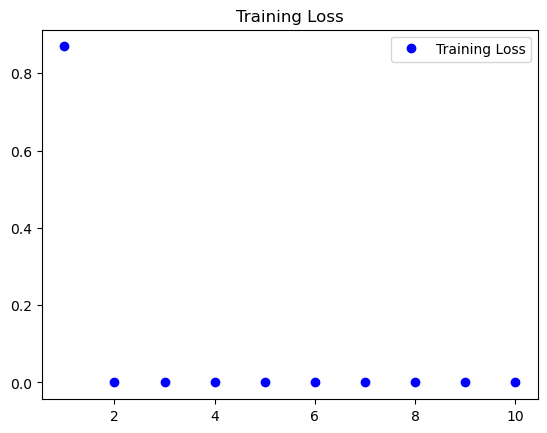

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()


In [32]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)


Found 100 images belonging to 2 classes.


In [34]:
test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('\nTest Accuracy:', test_acc)


10/10 [==============================] - 1s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000

Test Accuracy: 1.0


## Análisis de los resultados con una matriz de confusión
Para ver el comportamiento de nuestras predicciones, podemos hacer una matriz de confusión y evaluar los falsos positivos, falsos negativos y aciertos.

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [38]:
y_pred = model.predict(test_generator)  
y_pred_binary = np.round(y_pred)  
y_true = test_generator.classes  


20/20 [==============================] - 2s 72ms/step


In [39]:
cm = confusion_matrix(y_true, y_pred_binary)




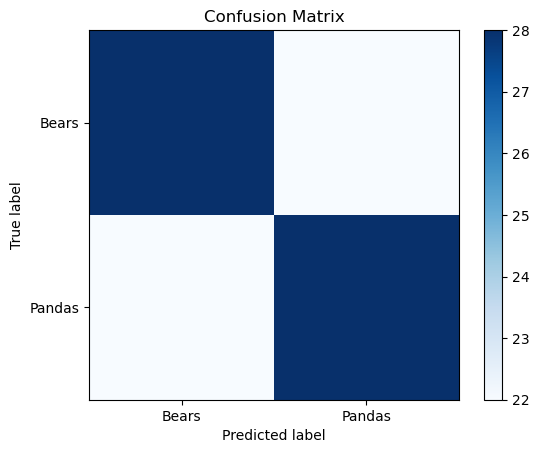

In [41]:
classes = list(test_generator.class_indices.keys())
fig, ax = plt.subplots()
cm = np.flip(cm, axis=0) 
yticklabels = classes[::-1] 

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes, title='Confusion Matrix',
       ylabel='True label', xlabel='Predicted label')
plt.show()


En este caso, debido a la alta calidad del modelo base MobileNetV2 y a la simplicidad del dataset, podemos observar que el modelo logró predecir correctamente todas las clases del set de pruebas. Esto lo confirmamos al ver que todas las predicciones coinciden en la intersección de Panda con Panda y Bears con Bears